**Индивидуальное задание**

1. Набор данных winequality-red.csv.
2. Постройте модель регрессии.

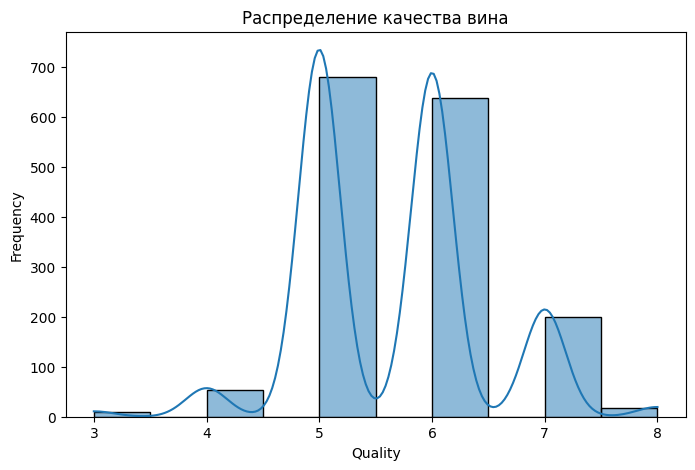

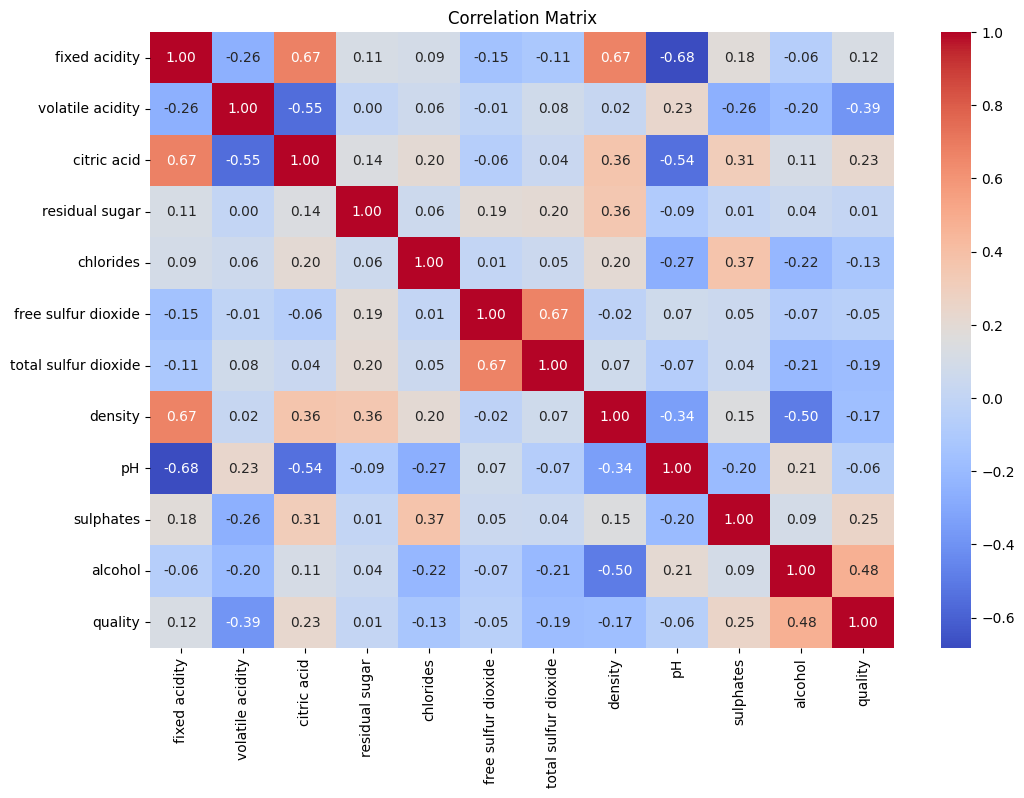


Среднеквадратичная ошибка (MSE): 0.39
Коэффициент детерминации (R^2): 0.40


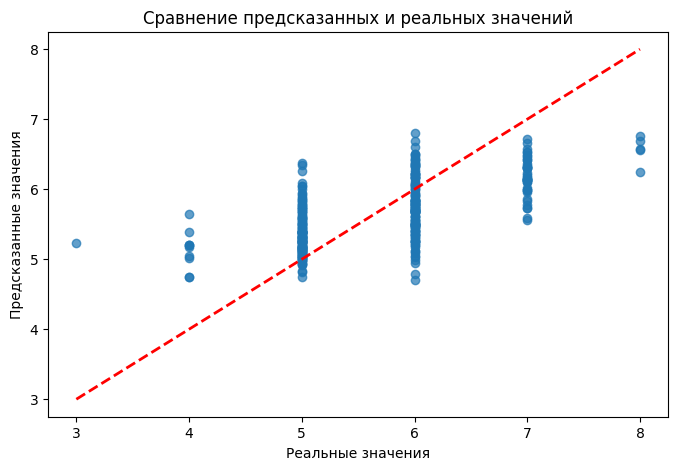

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1: Загрузка данных
file_path = "winequality-red.csv"
data = pd.read_csv(file_path, sep=";")  # Задаем разделитель, если необходимо

# 2: Визуализация данных
plt.figure(figsize=(8, 5))
sns.histplot(data["quality"], bins=10, kde=True)
plt.title("Распределение качества вина")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 3: Построение пайплайна
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

# Шаг 4: Визуализация результатов
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--r", lw=2)
plt.title("Сравнение предсказанных и реальных значений")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.show()


**Выводы по графикам**

1. Большая часть вин находится в среднем сегменте качества, с редкими отклонениями в обе стороны.
2. Красная пунктирная линия представляет собой идеальное соответствие предсказаний реальным значениям (линия 𝑦 = 𝑥). Точки, расположенные ближе к этой линии, означают более точные предсказания. Большинство точек находятся вблизи линии, что указывает на достаточно хорошую работу модели.